In [1]:
from importnb import Notebook
with Notebook():
    from quantumsystem import QuantumSystem, qs, System, HyperSystem, MetaSystem, IntegerSystem
    from MovementSystem import XYLocation, Elevation

In [2]:
class Modifier(IntegerSystem):
    """ Value to adjust Dice Roll Target for Attack """

In [3]:
class Damage(IntegerSystem):
    """ Damage done on a successful Attack """

In [4]:
@Modifier.sd
@Damage.sd
class Targeting(HyperSystem):
    """ Ranged attack modifier and damage values """

In [5]:
@Targeting.sd
class ShortRangeWeapons(MetaSystem):
    """ asdf """

@Targeting.sd
class MidRangeWeapons(MetaSystem):
    """ asdf """

@Targeting.sd
class LongRangeWeapons(MetaSystem):
    """ asdf """

In [6]:
class OverheatValue(IntegerSystem):
    """ Number of Overheat slots """

In [7]:
class OverheatDamage(IntegerSystem):
    """ Additional Damage from overheating """

In [8]:
@OverheatDamage.sd
@OverheatValue.sd
class Overheat(HyperSystem):
    """ Overheating System """

In [9]:
@ShortRangeWeapons.sd
@MidRangeWeapons.sd
@LongRangeWeapons.sd
@Overheat.sd
class Weapons(HyperSystem):
    """ Weapons System """

    @classmethod
    @XYLocation.d
    @Elevation.d
    def range(cls, entity: str, target: str, elevation, xylocation):
        target_xylocation = XYLocation(target).terminant
        target_elevation = Elevation(target).terminant
        entity_xyz = [*xylocation, elevation]
        target_xyz = [*target_xylocation, target_elevation]
        targetDistance = sum([(d1 - d0) ** 2 for d0, d1 in zip(entity_xyz, target_xyz)]) ** 0.5
        return "short" if targetDistance < 155 else "medium" if targetDistance < 610 else "long"

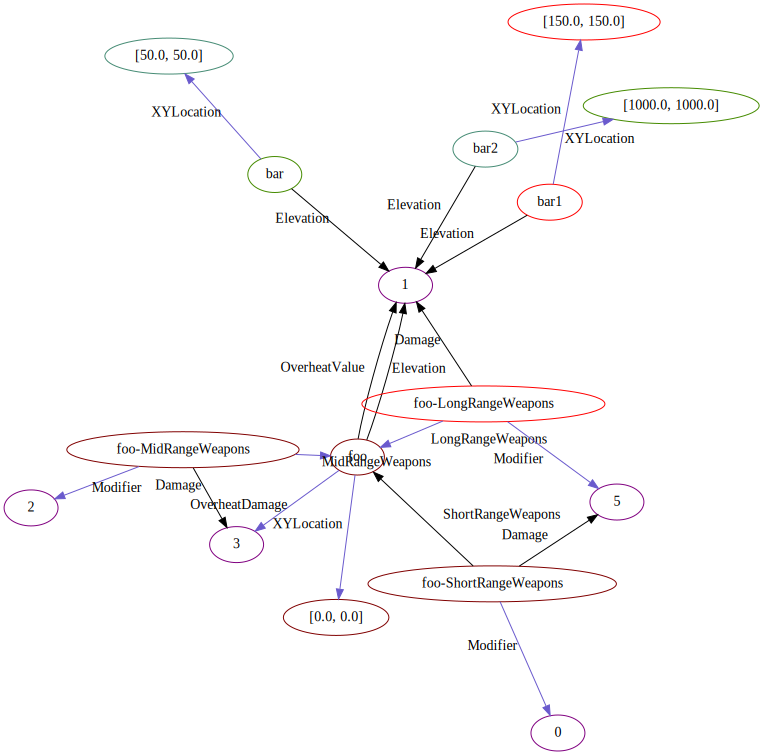

In [10]:
if __name__ == "__main__":
    from IPython.display import display
    qs.reset()
    Weapons("foo",
        ShortRangeWeapons={"Targeting": {"Modifier": "0", "Damage": "5"}},
        MidRangeWeapons={"Targeting": {"Modifier": "2", "Damage": "3"}},
        LongRangeWeapons={"Targeting": {"Modifier": "5", "Damage": "1"}},
        Overheat={"OverheatValue": "1", "OverheatDamage": "3"})
    XYLocation("foo", [0, 0])
    Elevation("foo", 1)
    XYLocation("bar", [50, 50])
    Elevation("bar", 1)
    XYLocation("bar1", [150, 150])
    Elevation("bar1", 1)
    XYLocation("bar2", [1000, 1000])
    Elevation("bar2", 1)
    assert Weapons.entities() == ['foo']
    assert Weapons.range(entity="foo", target="bar") == "short"
    assert Weapons.range(entity="foo", target="bar1") == "medium"
    assert Weapons.range(entity="foo", target="bar2") == "long"
    display(qs.render())